Lasso Regression does **not** have a closed-form solution due to the **L1 regularization term** (\(\sum |\beta_j|\)), which makes the loss function **non-differentiable** at \(\beta_j = 0\). Instead, it is typically solved using **iterative optimization algorithms**, such as:  

- **Coordinate Descent** (most commonly used)  
- **Least Angle Regression (LARS)**  
- **Gradient Descent**  

### **Why No Closed-Form Solution?**
In **Ordinary Least Squares (OLS)** or **Ridge Regression (L2 regularization)**, the loss function is differentiable, allowing for a direct analytical solution using matrix algebra:

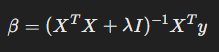

However, in **Lasso**, the **absolute value function** (\(|\beta_j|\)) introduces non-differentiability at zero. This prevents a single closed-form formula from existing.

### **Alternative Approach: Soft Thresholding (Coordinate Descent)**
While no closed-form solution exists for all \(\beta\), a **soft-thresholding** approach is used for each coordinate update in **Coordinate Descent**:

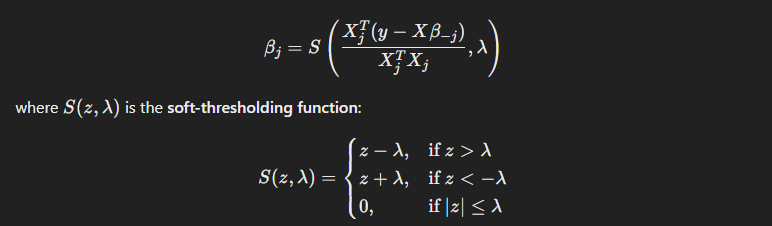
where \( S(z, \lambda) \) is the **soft-thresholding function**:

\[
S(z, \lambda) =
\begin{cases}
z - \lambda, & \text{if } z > \lambda \\
z + \lambda, & \text{if } z < -\lambda \\
0, & \text{if } |z| \leq \lambda
\end{cases}
\]

This function **shrinks** coefficients toward zero, performing both **regularization and feature selection**.

Would you like a Python implementation demonstrating Coordinate Descent for Lasso? 🚀

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split

In [4]:
X,y = make_regression(n_samples=1000,n_features=10,noise=70,random_state=41)

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=41)

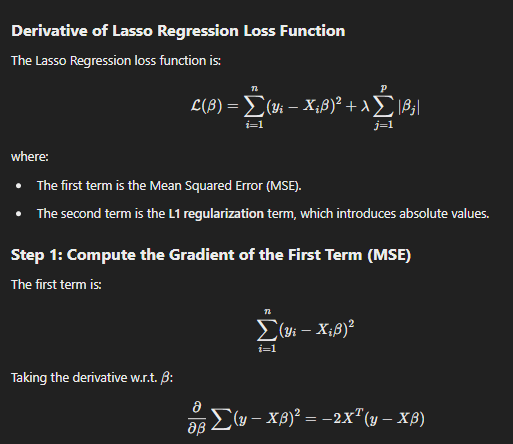

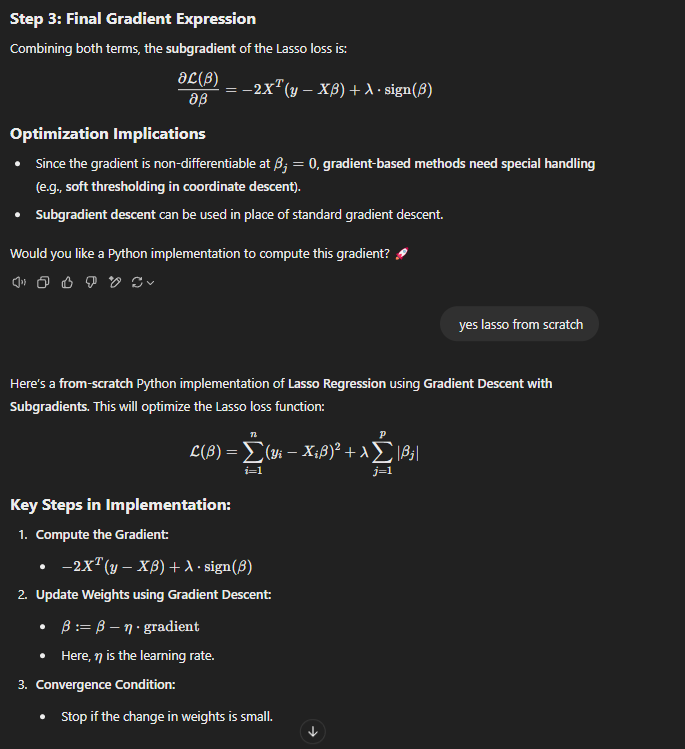

In [11]:
import numpy as np

class LassoRegression:
    def __init__(self, learning_rate=0.01, lambda_=0.1, max_iter=1000, tol=1e-6):
        self.learning_rate = learning_rate
        self.lambda_ = lambda_
        self.max_iter = max_iter
        self.tol = tol
        self.beta = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.beta = np.zeros(n_features)  # Initialize weights

        for i in range(self.max_iter):
            y_pred = X.dot(self.beta)  # Compute predictions
            gradient = -2 * X.T.dot(y - y_pred) / n_samples  # Compute gradient of MSE
            subgradient = np.sign(self.beta)  # L1 regularization subgradient
            gradient += self.lambda_ * subgradient  # Add L1 penalty

            beta_new = self.beta - self.learning_rate * gradient  # Gradient update

            # Convergence check
            if np.linalg.norm(beta_new - self.beta, ord=1) < self.tol:
                break

            self.beta = beta_new  # Update weights

    def predict(self, X):
        return X.dot(self.beta)

In [9]:
# Train Lasso model
lasso = LassoRegression(learning_rate=0.01, lambda_=0.1, max_iter=1000)
lasso.fit(X_train, y_train)

# Predictions
y_pred = lasso.predict(X_test)
print("Lasso Coefficients:", lasso.beta)

print("R2 score",r2_score(y_test,y_pred))

Lasso Coefficients: [66.74483617 90.91929192 50.99382088 55.11409502 34.18610495]
R2 score 0.9922157151571086
